# 1、对数周期幂律模型

$$
\ln p_{t} \approx A+B\left(t_{c}-t\right)^{\beta}+C\left(t_{c}-t\right)^{\beta} \cos \left[\omega \ln \left(t_{c}-t\right)+\phi\right]
$$

### tc为临界时间点，p(t)为t时刻股票价格；A = lnp(tc)>0, 为p(t)在临界时刻的对数值； B<0为C无限接近于零时单位时间内增长量；C为指数增长的波动振幅因子。β为幂指数，w为波动频率，$\phi$为相位 

### $$ 趋同和羊群效应导致泡沫的产生，幂指数β值得大小是由市场上理性投资者和非理性投资者的各自占比决定, 资产的价格因投资者之间正反馈作用的存在，呈现出幂指数的形式增长，而w值的大小时有投资者观点一致性程度决定的 $$

### 根据该模型，资产价格随时间增长有着近似指数增长的特点，同时也伴随着不断地振荡。但是随着时间越来越节点临界时间点，振荡地幅度逐渐减弱，增长速度逐渐增大，进入超指数的增长状态，最终市场在临界点时间点附近崩盘。

### 待估参数：
 tc，A，B，C，β，w，$\phi $

### 拟合对数周期幂律方程：parameter = argmin (lnP - ln(P_hat)) ^ 2
$$
S E=\sum_{t=t_{1}}^{t_{n}}\left(y_{t}-\hat{y}_{t}\right)^{2}=\sum_{t=t_{1}}^{t_{m}}\left\{y_{t}-A-B\left(t_{c}-t\right)^{\beta}\left[1+C \cos \left(\omega \log \left(t_{c}-t\right)+\phi\right]\right\}^{2}\right.      -----    (10)
$$

### 当待估参数过多时，目标函数容易陷入局部最小值，这可以通过减少待估参数的个数方法，提高待估参数拟合的精度
### 因此对LPPL模型公式进行简化


$$
\ln p_{t} \approx A+B\left(t_{c}-t\right)^{\beta}+C\left(t_{c}-t\right)^{\beta} \cos \left[\omega \ln \left(t_{c}-t\right)+\phi\right]         
$$  
$$
y_{t}=A+B f_{t}+C g_{t}          ----- （11）
$$

### 其中
$$
\begin{array}{l}{y_{t}=\ln p_{t}} \\ {f_{t}=\left(t_{c}-t\right)^{\beta}} \\ {g_{t}=\left(t_{c}-t\right)^{\beta} \cos \left(\omega \ln \left(t_{c}-t\right)+\phi\right)}\end{array}      ------  (12)
$$

### fitness = Σ(yt - A - B*ft - C*gt) ** 2

$$
\left(\begin{array}{c}{\sum_{i=1}^{N} y_{i}} \\ {\sum_{i=1}^{N} y_{i} f_{i}} \\ {\sum_{i=1}^{N} y_{i} g_{i}}\end{array}\right)=\left(\begin{array}{ccc}{N} & {\sum_{i=1}^{N} f_{i}} & {\sum_{i=1}^{N} g_{i}} \\ {\sum_{i=1}^{N} f_{i}} & {\sum_{i=1}^{N} f_{t}^{2}} & {\sum_{i=1}^{N} f_{i} g_{i}} \\ {\sum_{i=1}^{N} g_{i}} & {\sum_{i=1}^{N} f_{i} g_{i}} & {\sum_{i=1}^{N} g_{i}^{2}}\end{array}\right)\left(\begin{array}{c}{A} \\ {B} \\ {C}\end{array}\right)
$$

# 2、求解参数
 
### 通过拟合出 tc，A，B，C，β，w，$\phi $ 这几个参数就可以得到泡沫破裂的时期

### 导入相关库

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
%matplotlib inline
from pylab import mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [ ]:
path = 'C:/Users/lihongyu/Desktop/jupyter_code/对数周期幂律/'
data = pd.read_excel(path+"bitcoin.xls",header=None)
df = pd.DataFrame(data=data.values.reshape(-1,7),columns=['日期', '开盘价（$）', '最高价（$）', '最低价（$）','收盘价（$）','24H额（$）', '市值（$）'])
df.index = [str(i)[:10] for i in df['日期'].values]
df.drop(['日期'], axis=1, inplace=True) 
df = df[::-1]

In [26]:
def fit(P0):  
    fitne = np.zeros(P0.shape[0])
    for i in range(P0.shape[0]):     
        P = P0[i]
        tc = P[0]
        beta = P[1]
        w = P[2]
        phi = P[3] 

        f = np.array([(tc - t)**beta for t in range(N)])
        g = np.array([(tc - t)**beta * np.cos(w*np.log(tc-t)+ phi) for t in range(N)])
        M = np.linalg.pinv(np.matrix([[N,np.sum(f), np.sum(g)],
                      [np.sum(f), np.sum(f**2), np.sum(f*g)],
                      [np.sum(g), np.sum(f*g), np.sum(g**2)]]))
        m = np.matrix([[np.sum(y)], [np.sum(y*f)], [np.sum(y*g)]])
        A,B,C = np.dot(M,m).tolist()
        fitne[i] = np.sum((y - A - B*f - C*g)**2)
    return fitne

def get_fitness(pred):
    return pred.flatten()

### 繁殖产生新的种群
def make_kid(pop, n_kid, DNA_SIZE,POP_SIZE,gen):

    kids = np.zeros((n_kid, DNA_SIZE))  # 后代种群(空)

    ### 对每个后代进行赋值（根据父母）
    for i in range(n_kid):
        parent1, parent2 = np.random.choice(np.arange(POP_SIZE), size=2, replace=False)    # 选择参与交叉得个体（即选择双亲）
        cp = np.random.randint(0, 2, DNA_SIZE, dtype=np.bool)                              # 选择交叉得位置
        kids[i,cp] =  pop[parent1, cp]                                                     # 交叉后得个体
        kids[i,~cp] = pop[parent2, ~cp]                                                   # 交叉后得个体
        # 变异
        kids[i,0]  += 10 * np.random.randn(1) / np.sqrt(gen+1)
        kids[i,1:] +=  np.random.randn(1) / np.sqrt(gen+1)
        # 防止超出上下界 
        kids[i,0] = np.clip(kids[i,0], N,N+180)                      # tc
        kids[i,1] = np.clip(kids[i,1], 0,1)                          # beta
        kids[i,2] = np.clip(kids[i,2], 6,13)                         # w
        kids[i,3] = np.clip(kids[i,3], 0, 2*np.pi)                   # phi
        
    kids_fitness = get_fitness(fit(kids))
        
    return kids, kids_fitness

def kill_bad(pop, kids,  POP_SIZE,parent_fitness, kids_fitness):
    
    # 把父母和孩子放在一起
    pop = np.vstack([pop, kids])    # 按行合并 
    fitness = np.hstack([parent_fitness, kids_fitness])

    best_index = np.argmin(fitness)   #  最优个体索引
    best_pop = pop[best_index,:]      # 最优个体
    good_index = np.argsort(fitness)[:POP_SIZE]  # 选出适应度最小得前POP_SIZE个个体,np.argsort()从小到大排序
    pop = pop[good_index]                # 更新种群
    parent_fitness = fitness[good_index]  # 更新父代适应度
    return pop,best_pop,parent_fitness 


def GA(DNA_SIZE,POP_SIZE, N_KID,N_GENERATIONS):
    pop = np.random.normal(np.array([N,.5,10,3.14]),np.array([10,1, 1,1]), size=(POP_SIZE, DNA_SIZE))  #初始种群
    print('初值',pop)
    pop[:,0] = np.clip(pop[:,0], N,N+180)                        # tc
    pop[:,1] = np.clip(pop[:,1], 0,1)                            # beta
    pop[:,2] = np.clip(pop[:,2], 6,13)                           # w
    pop[:,3] = np.clip(pop[:,3], 0, 2*np.pi)                     # phi
    Best_pop = pop[0]   # 初始化最好个体|
    parent_fitness = get_fitness(fit(pop))
    for gen in range(N_GENERATIONS):
        if gen% 10 == 0:
            print('第：%d代------------------------------------------------------------------'%gen) 
        kids, kids_fitness = make_kid(pop, N_KID,DNA_SIZE,POP_SIZE,gen)
        pop,Best_pop,parent_fitness = kill_bad(pop, kids,  POP_SIZE,parent_fitness,kids_fitness)
    
    #return res,Best_pop
    return Best_pop

In [57]:
# start = '2017-09-13'
# end = '2017-11-22'
# pt = df[start:end]['开盘价（$）'].astype('float').values
# N = len(pt)
# y = np.log(pt)
start = '2019-02-28'
end = '2019-06-06'
pt = df[start:end]['开盘价（$）'].astype('float').values
N = len(pt)
y = np.log(pt)

In [1]:
Pars = []
for i in range(10):
    par = GA(DNA_SIZE=4,POP_SIZE=100, N_KID=50,N_GENERATIONS=50)
    Pars.append(par)

In [84]:
def test(P0):
    tc = P0[0]
    beta = P0[1]
    w = P0[2]
    phi = P0[3] 
    f = np.array([(tc - t)**beta for t in range(N)])
    g = np.array([(tc - t)**beta * np.cos(w*np.log(tc-t)+ phi) for t in range(N)])
    M = np.linalg.pinv(np.matrix([[N,np.sum(f), np.sum(g)],
                  [np.sum(f), np.sum(f**2), np.sum(f*g)],
                  [np.sum(g), np.sum(f*g), np.sum(g**2)]]))
    m = np.matrix([[np.sum(y)], [np.sum(y*f)], [np.sum(y*g)]])
    A,B,C = np.dot(M,m).tolist()
    
    A,B,C = A[0],B[0],C[0]
    print('tc:%f，A:%f，B:%f，C:%f，β:%f，w:%f，ϕ:%f'%(tc,A,B,C,beta,w,phi))
    p_predict = [np.exp(A+B*(tc-t)**beta + C*(tc-t)**beta*np.cos(w*np.log(tc-t)+phi))  for t in range(N)]
    index = df[start:end].index
    %matplotlib notebook
    plt.figure(figsize=(15,8))
    plt.plot(index,p_predict, label='predict',c='b')
    plt.plot(index, pt, label='true',c='r')
    plt.xticks(index[::5],rotation=90)
    plt.legend()

## 测试拟合效果

tc:115.195584，A:9.694064，B:-0.116578，C:-0.005690，β:0.538871，w:11.836345，ϕ:3.243558


<IPython.core.display.Javascript object>


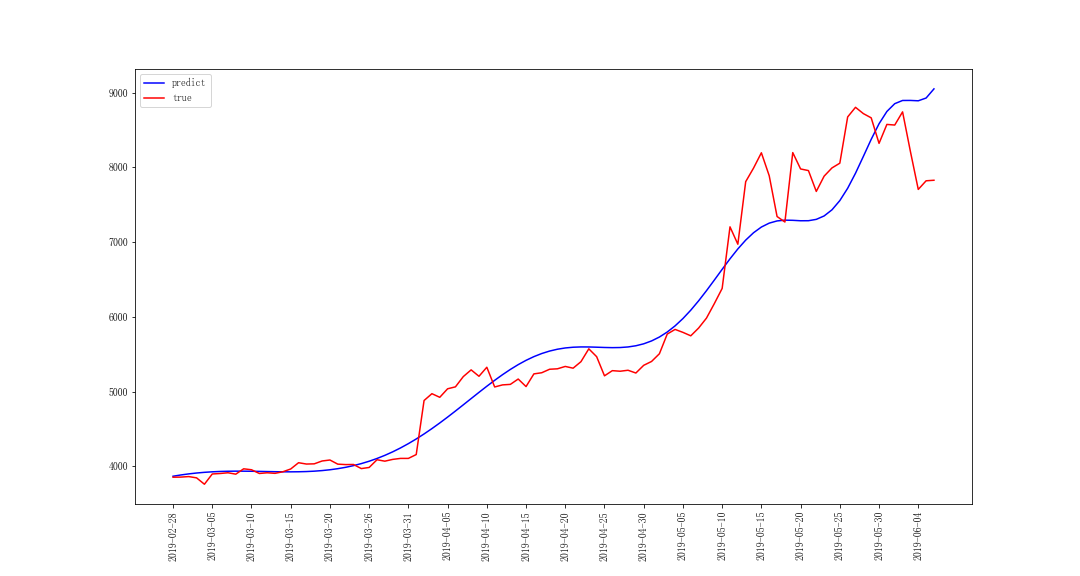

In [85]:
test(np.mean(np.array(Pars),axis=0))

In [65]:
Tc = np.mean([i[0] for i in Pars])

<IPython.core.display.Javascript object>


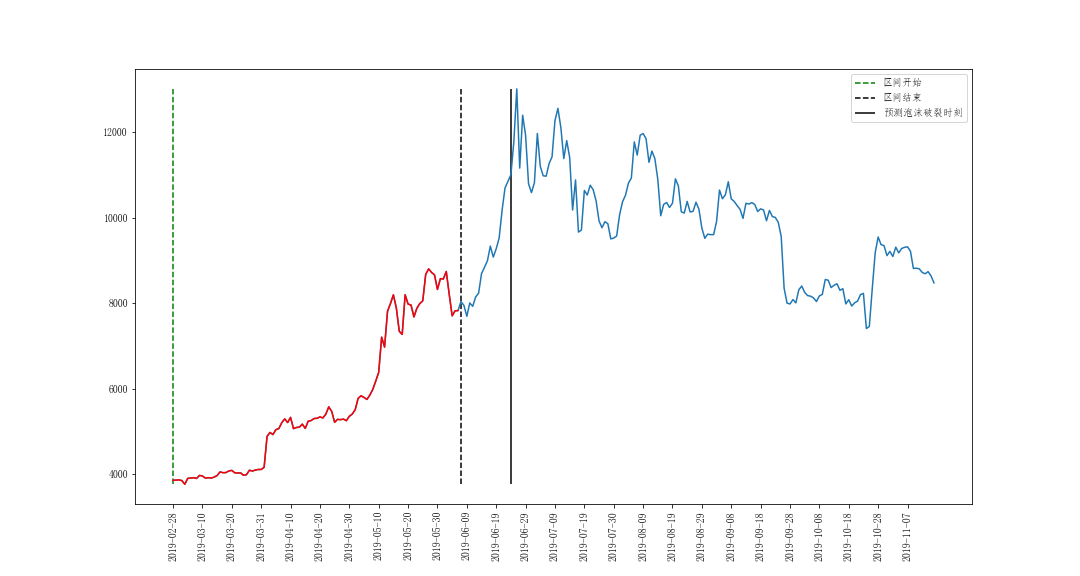

In [78]:
%matplotlib notebook
plt.figure(figsize=(15,8))
plt.plot(df[start:]['开盘价（$）'].index, df[start:]['开盘价（$）'].astype('float').values)
plt.vlines(df[start:]['开盘价（$）'].index[0],np.min(df[start:]['开盘价（$）'].values),np.max(df[start:]['开盘价（$）'].values),linestyles='dashed',color='g' ,label='区间开始')
plt.plot(df[start:end]['开盘价（$）'].index, df[start:end]['开盘价（$）'].astype('float').values, color='r')
# plt.vlines(df2.index[N], np.min(df2['2010-10-04':'2015-04-08'].open.values),np.max(df2['2010-10-04':'2015-04-08'].open.values))
plt.vlines(df[start:]['开盘价（$）'].index[N], np.min(df[start:]['开盘价（$）'].values),np.max(df[start:]['开盘价（$）'].values),linestyles='dashed',label='区间结束' )
plt.vlines(df[start:]['开盘价（$）'].index[int(Tc)], np.min(df[start:]['开盘价（$）'].values),np.max(df[start:]['开盘价（$）'].values),label='预测泡沫破裂时刻')
# plt.vlines(df2['2015-06-01':'2015-05-04'].index, np.min(df2['2014-01-01':].open.values),np.max(df2['2014-01-01':].open.values))
plt.xticks(df[start:]['开盘价（$）'].index[::10],rotation=90)
plt.legend()
plt.savefig(path+start+'-'+end+'.png',dpi=300)


### 绿色的虚线是我们认为定义的起点
### 黑色的虚线是当前时刻
### 黑色的实线是预测未来泡沫破裂的时刻